Importing all libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving house1.csv to house1.csv


In [0]:
data1=pd.read_csv('house1.csv')

In [0]:
data1.head()

,dataid,localminute,air1,refrigerator1,microwave1,use
0,5403,2015-02-01 06:00:00+00:00,0.003,0.147,0.004,0.987
1,5403,2015-02-01 06:00:01+00:00,0.003,0.148,0.003,0.986
2,5403,2015-02-01 06:00:02+00:00,0.000,0.148,0.003,0.989
3,5403,2015-02-01 06:00:03+00:00,0.000,0.147,0.000,0.986
4,5403,2015-02-01 06:00:04+00:00,0.000,0.148,0.003,0.989


In [0]:
data1.iloc[:,2:].corr()

,air1,refrigerator1,microwave1,use
air1,1.000000,0.033406,0.021014,0.635208
refrigerator1,0.033406,1.000000,0.017958,0.107811
microwave1,0.021014,0.017958,1.000000,0.109706
use,0.635208,0.107811,0.109706,1.000000


In [0]:
data2=pd.read_csv('house2.csv')
data3=pd.read_csv('house3.csv')
data4=pd.read_csv('house4.csv')

In [0]:
df=pd.concat([data1,data2],axis=0,ignore_index=True)

In [0]:
import datetime
df['localminute']=df['localminute'].apply(lambda x:x.replace('+00:00',''))
df['air1']=df['air1'].apply(lambda x:float(x))
df['refrigerator1']=df['refrigerator1'].apply(lambda x:float(x))
df['microwave1']=df['microwave1'].apply(lambda x:float(x))
#df['localminute']=df['localminute'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [0]:
df.head()

,dataid,localminute,air1,refrigerator1,microwave1,use
0,5403,2015-02-01 06:00:00,0.003,0.147,0.004,0.987
1,5403,2015-02-01 06:00:01,0.003,0.148,0.003,0.986
2,5403,2015-02-01 06:00:02,0.000,0.148,0.003,0.989
3,5403,2015-02-01 06:00:03,0.000,0.147,0.000,0.986
4,5403,2015-02-01 06:00:04,0.000,0.148,0.003,0.989


In [0]:
df.iloc[:,1:].describe()

,air1,refrigerator1,microwave1,use
count,4.838402e+06,4.838402e+06,4.838402e+06,4.838402e+06
mean,3.545235e-03,5.621851e-02,5.124357e-03,6.815196e-01
std,7.985108e-02,7.570074e-02,6.580746e-02,9.296524e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.000000e-03,0.000000e+00,3.270000e-01
50%,0.000000e+00,3.000000e-03,3.000000e-03,4.360000e-01
75%,0.000000e+00,1.320000e-01,4.000000e-03,6.290000e-01
max,2.881000e+00,1.261000e+00,2.019000e+00,1.140300e+01


In [0]:
df['air1'].mean()-df['air1'].median()

0.003545234563033267

In [0]:
df['microwave1'].mean()-df['microwave1'].median()

0.0021243569676182806

In [0]:
df['refrigerator1'].mean()-df['refrigerator1'].median()

0.0532185109869936

Since the data set has no any outlier value because differene of mean and median is very less.

Text(0, 0.5, 'Number of times upto 2000')

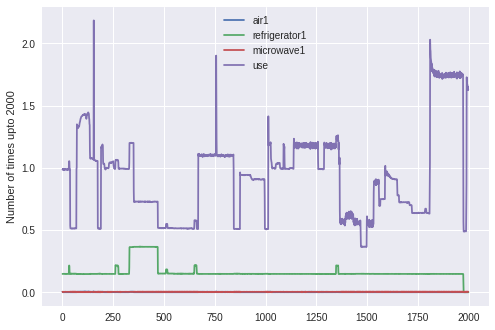

In [0]:
df.iloc[:2000,1:].plot()
plt.ylabel("Number of times upto 2000")

In [0]:
X=df.iloc[:,2:-1]
Y=df.iloc[:,-1]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [0]:
x=df.iloc[:,2:-1]

In [0]:
list1=[x['air1'].mean(),x['refrigerator1'].mean(),x['microwave1'].mean()]

plotting bar plot of mean dataset

Text(0.5, 1.0, 'Electrical Apliance mean')

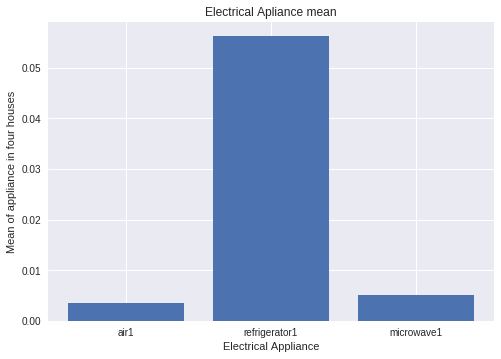

In [0]:
plt.bar(height=list1,x=["air1","refrigerator1","microwave1"])
plt.xlabel("Electrical Appliance")
plt.ylabel("Mean of appliance in four houses")
plt.title("Electrical Apliance mean")

#plotting the Dataset using normal curve

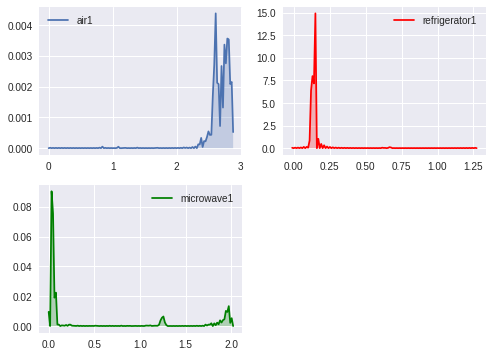

In [0]:
plt.figure(figsize=(8,6))
plt.subplot(221)
for col in ["air1"]:
    sns.kdeplot(x[col],shade=True)
plt.subplot(222)
for col in ["refrigerator1"]:
    sns.kdeplot(x[col],shade=True,color="r")
plt.subplot(223)
for col in ["microwave1"]:
    sns.kdeplot(x[col],shade=True,color="g")

plotting the histogram using normal distribution

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


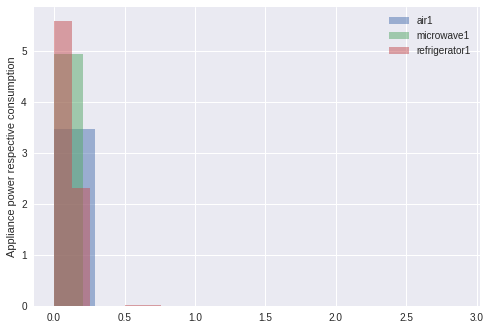

In [0]:
plt.hist(x["air1"],normed=True,alpha=0.5,label="air1")
plt.hist(x["microwave1"],normed=True,alpha=0.5,label="microwave1")
plt.hist(x["refrigerator1"],normed=True,alpha=0.5,label="refrigerator1")
plt.ylabel("Appliance power respective consumption")
plt.legend()

grouping the dataset through timeparser and summing them all

In [0]:
y=df.groupby("localminute")[["air1","microwave1","refrigerator1"]].sum()

plotting the dataset with bar plot

Text(0, 0.5, 'Appliance power consumption vs Time')

<Figure size 1080x360 with 0 Axes>

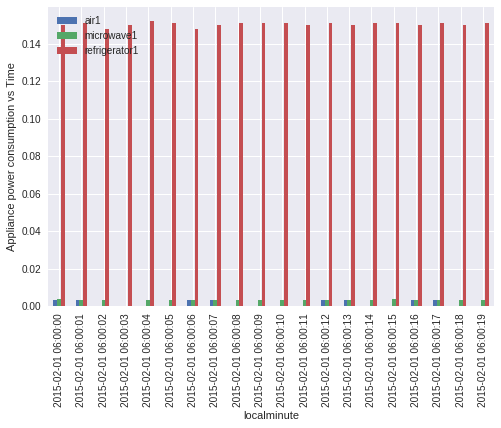

In [0]:
plt.figure(figsize=(15,5))
y[:20].plot(kind='bar')
plt.ylabel("Appliance Power consumption with time")
plt.ylabel("Appliance power consumption vs Time")

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
Regressor=PolynomialFeatures(degree=2)

In [0]:
X1=Regressor.fit_transform(X_train)
Regressor.fit(X1,Y_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [0]:
from sklearn.linear_model import LinearRegression
regressor_1=LinearRegression()
regressor_1.fit(X1,Y_train)
y_pred=regressor_1.predict(Regressor.fit_transform(X_test))

In [0]:
(Y_test/y_pred).mean()

0.90863545744919

In [0]:
Y_test.head()

42399      0.565
3710852    0.586
2660256    1.080
4022946    0.507
2957414    0.449
Name: use, dtype: float64

Text(0.5, 1.0, 'Appliance power consumption vs TOtal power')

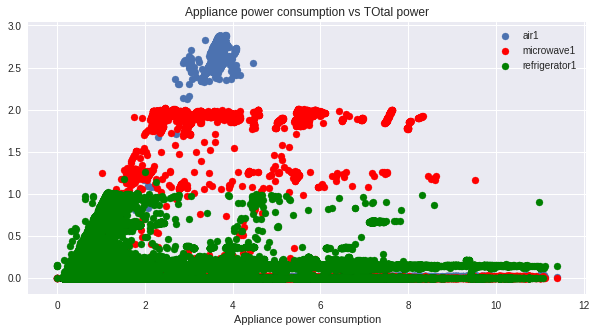

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(y=X_train['air1'],x=Y_train,label="air1")
plt.scatter(y=X_train["microwave1"],x=Y_train,color='r',label="microwave1")
plt.scatter(y=X_train['refrigerator1'],x=Y_train,color='g',label="refrigerator1")
plt.xlabel("Y_train")
plt.xlabel("Appliance power consumption")
plt.title("Appliance power consumption vs Total power")
plt.legend()

Text(0.5, 1.0, 'Fluctuation of y_pred with Y_test')

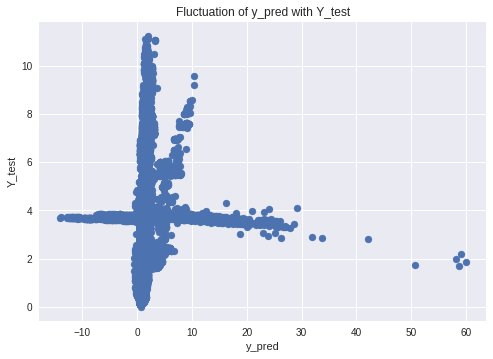

In [0]:
plt.scatter(y=Y_test,x=y_pred)
plt.xlabel("y_pred")
plt.ylabel("Y_test")
plt.title("Fluctuation of y_pred with Y_test")